# **ERDBEBEN - Wo und Warum ?**
Willkommen zum Jupyter-Notebook "*Erdbeben - Wo und warum ?*" welches im Rahmen des *seismo-at-school* Projektes am Schweizerischen Erdbebendienst ([SED](http://seismo.ethz.ch/de/home/)) an der ETH Zürich, der Universität Lausanne und dem CPPS in Sion entwickelt wurde.

---
---

Um den nachfolgenden Python-Code auszuführen, gehe auf die Menuleiste oben und klicke unter Menupunkt **"Laufzeit" (engl. "Runtime")** zunächst **"Alle ausführen (engl. "Run all")"** und dann **"Sitzung neustarten und alle ausführen" (engl. "Restart session and run all")**".

Du solltest nach einigen Sekunden unten Ergebnisse sehen. Du kannst einzelne Parameter, wie zum Beispiel die minimale Magnitude, ändern und den Code erneut ausführen. **Bitte klicke dazu jeweils auf den Pfeil oben links in der jeweiligen grauen Box.**

Viel Spass!



**to do (internal notes):**

Irina: Du verweist ja, auf eine externe Abbildung mit den Plattengrenzen. Allenfalls könnten wir eine interne entwickeln und auf diese verweisen.
Fred:
(1) the magic ! commands that might install what’s missing but won’t try to import again after installing missing deps; Define depends in a requirement file in a way that binder setup the right environment before running the notebook, follow instructions here : https://the-turing-way.netlify.app/communication/binder/zero-to-binder.html#pinning-dependencies

(2) I recommend that you put all your notebooks in GitHub and add a link in its README so people can directly open in https://mybinder.org/ (check out the nice badge that can be customised and added to your readme and notebook).

(3) Also I suggest avoiding google and prefer Jupyter’s binder.

In [ ]:
# @title
import warnings
warnings.filterwarnings("ignore")
try:
    import obspy
except:
    !pip install obspy | grep -v 'already satisfied'

import numpy as np
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt


# **1. Erdbeben Weltweit**

Seismometer zeichnen Erschütterungen von Erdbeben auf der ganzen Welt auf. Die Magnituden (= Stärke) und Orte der Erdbeben werden in **Erdbebenkatalogen** gesammelt und von Seismologen und Seismologinnen ausgewertet. Versuche es auch einmal!


## **Aufgaben:**
Wähle im Feld unten ein beliebiges Jahr (z. B. *year* = 2023) und suche im Erdbebenkatalog nach Erdbeben, die sich in diesem Jahr irgendwo auf der Welt ereignet haben.

1.   Setze die minimale Magnitude (*minmag*) für Deine Katalog-Suche auf **5.0**. Starte den Code durch Drücken der Pfeiltaste (links) und schaue Dir die **Erdbebenverteilung** auf der Weltkarte an. Was fällt Dir auf? Sind Erdbeben gleichmässig über die Erde verteilt? Vergleiche zum Beispiel mit dieser [Abbildung](https://www.eskp.de/grundlagen/naturgefahren/plattentektonik-und-vulkanismus-935407/).
2.   Die Magnitude misst die Stärke eines Erdbebens. **Wieviele Erdbeben im Jahr 2023** hatten eine
  *  **Magnitude von 5.0 bis 6.0**
  *  **Magnitude von 6.0 bis 7.0**
  *  **Magnitude von 7.0 bis 8.0**

  und **wieviel Energie** haben sie jeweils freigesetzt? Stelle Deine Ergebnisse (Anzahl der Erdbeben pro Magnitudeninterval) mit Hilfe eines Säulendiagramms auf einem Blatt Papier dar. Schreibe oberhalb jeder Säule die **freigesetzte Energie**. Was fällt Dir auf ? Zum Vergleich: Die Atombombe von Hiroshima hatte eine Sprengkraft von etwa 13.000 Tonnen TNT*. (*Das TNT-Äquivalent ist eine gebräuchliche Maßeinheit für die bei einer Explosion freigesetzte Energie.)
  
3. Welches war weltweit das **grösste Erdbeben im Jahr 2023**, wie stark war es und wo hat es sich ereignet ? Suche im Internet nach zusätzlichen Informationen.


In [ ]:
# Diese Parameter kannst Du ändern:
year   = 2023
minmag = 5.0

In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:

maxmag = minmag + 1

try:
  if minmag>=5.0 and year>=1950:
    cat = Client("IRIS").get_events(minmag=minmag, maxmag=maxmag,
                                    starttime=obspy.UTCDateTime(str(year) + "-01-01T00:00"),
                                    endtime=obspy.UTCDateTime(str(year+1) + "-01-01T00:00"))

    energy_joule = 0
    for event in cat:
      energy_joule += pow(10,5.24 + (1.44 * event.magnitudes[0].mag))
    energy_tnt = energy_joule/(4.184 * pow(10,12)) #1 kT (Kilotonne TNT) = 1 · 1012 cal = 4.184 · 10**12 J

    print("Ich habe " + str(len(cat)) +" Erdbeben mit einer Magnitude zwischen "
          + str(minmag)+ " bis " +str(maxmag)+ " gefunden.")
    print("Zusammengenommen haben diese Erdbeben eine Energie von etwa "
          + str("{:.2E}".format(energy_joule).replace("E", "*10^"))
          + " Joule oder " + str(round(energy_tnt)) + " kT (Kilotonnen TNT) freigesetzt.")

    print(cat.__str__(print_all=False))
    cat.plot() #projection='global',label=None)
  else:
    print("Bitte wähle eine grössere Magnitude. Die Suche ist sonst zu langsam.")
except:
  print("Ich habe keine Erdbeben gefunden. Aendere Deine Parameter und versuche es noch einmal.")

Ich habe 488 Erdbeben mit einer Magnitude zwischen 5.5 bis 6.5 gefunden.
Zusammengenommen haben diese Erdbeben eine Energie von etwa 2.75*10^+16 Joule oder 6570 kT (Kilotonnen TNT) freigesetzt.
488 Event(s) in Catalog:
2023-12-30T17:16:23.772000Z |  -2.994, +139.369 | 6.3  mww
2023-12-30T17:16:23.000000Z |  -3.205, +139.289 | 6.5  Mi
...
2023-01-01T18:26:42.715000Z | -56.205, -123.434 | 5.8  Mww
2023-01-01T18:24:29.837000Z |  -2.526, +140.811 | 5.5  mww
To see all events call 'print(CatalogObject.__str__(print_all=True))'
Ich habe keine Erdbeben gefunden. Aendere Deine Parameter und versuche es noch einmal.


## **Gut zu wissen**

*  Die **Magnitude** misst die Stärke eines Erdbebens.

*  Kleinere Erdbeben treten viel häufiger auf als grosse, setzen aber deutlich weniger Energie frei. Es wären etwa **3 Millionen Erdbeben** der Magnitude 4 erforderlich, um so viel seismische Energie freizusetzen wie ein einziges Erdbeben der Magnitude 8.

*   Um ein Erdbeben mit einer **Magnitude 10** zu erzeugen, bräuchte man eine Verwerfung von über 14.000 km Länge. Das entspricht einem Drittel des Umfanges der gesamten Erde. Ist ein so grosses Erdbeben realistisch?

*  Die Erdbeben mit den grössten Magnituden sind nicht unbedingt die verheerendsten, und sie fordern auch nicht unbedingt die meisten Menschenleben. Die **Auswirkungen von einem Erdbeben** sind abhängig von
  *   der Erdbebentiefe (flache Erdbeben zerstörerischer als tiefere)
  *   den Bodenverhältnissen (weicher Untergrund verstärkt Erdbebenerschütterungen und damit die Zerstörung)
  *   der Bevölkerungsdichte und
  *   den örtlichen Baustandards.

# **2. Erdbeben in der Schweiz**

In der Schweiz erwarten wir grössere Schäden für Erdbeben mit einer Magnitude von 5.5 oder grösser.

## **Aufgaben:**
*   Wieviele Erdbeben mit einer **Magnitude von 5.5 oder grösser** (*minmag*=5.5) haben sich in der Schweiz **seit dem Jahr 1300** (*start_year*=1300) ereignet?
*   **Wie häufig** ereignet sich ein schadensbringendes Erdbeben mit einer Magnitude von 5.5 oder grösser in der Schweiz?

  *   etwa jedes Jahr
  *   etwa alle 10 Jahre
  *   etwa alle 50 Jahre
  *   etwa alle 50 bis 150 Jahre


*   Wann und wo hat sich das **stärkste Erdbeben in der Schweiz** seit 1300 ereignet?

In [ ]:
# Diese Parameter kannst Du ändern:
minmag      = 5.5
start_year  = 1300

Ich habe 12 Erdbeben mit einer Magnitude von 5.5 oder grösser seit dem Jahr 1300 gefunden.
Ich habe keine Erdbeben gefunden. Aendere Deine Parameter und versuche es noch einmal.


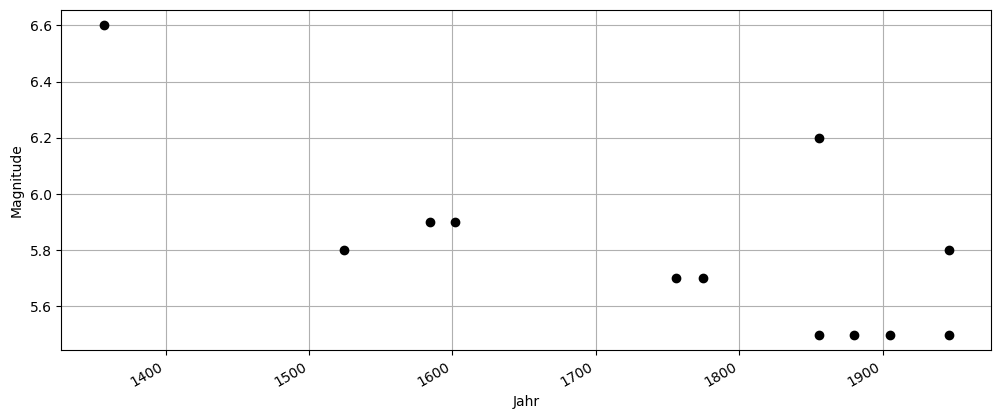

In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:

if minmag<5.5 and start_year<2010:
  print("Bitte wähle eine grössere Magnitude. Die Suche ist sonst zu langsam.")
else:
  try:
    cat = Client("ETH").get_events(minmag=minmag, minlat=45.75, maxlat=47.7, minlon=6, maxlon=10.3,
                                   starttime=obspy.UTCDateTime(str(start_year) + "-01-01T00:00"))
    print("Ich habe " + str(len(cat)) +" Erdbeben mit einer Magnitude von " +str(minmag)
    + " oder grösser seit dem Jahr " +str(start_year) + " gefunden.")
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.xaxis_date()
    for idx, event in enumerate(cat):
      otime = event.preferred_origin().time
      mag  = event.preferred_magnitude().mag
      plt.xlabel('Jahr')
      plt.ylabel('Magnitude')
      plt.plot(otime,mag,'ko')
      plt.grid(True)
      fig.autofmt_xdate()
    fig.set_figheight(5)
    fig.set_figwidth(12)
    if len(cat)<20:
      cat.plot(projection='local',label='magnitude')
    print(cat.__str__(print_all=True))
  except:
    print("Ich habe keine Erdbeben gefunden. Aendere Deine Parameter und versuche es noch einmal.")

## **Gut zu wissen**

*   Erdbeben können in der Schweiz **überall und jederzeit** auftreten.

*   Die meisten Erdbeben gibt es im **Wallis, Basel, Graubünden** und in der **Zentralschweiz**.

*   Erdbeben können **nicht vorhergesagt werden**, aber wir können berechnen, mit welcher **Wahrscheinlichkeit** bestimmte Bodenbeschleunigungen an einem Ort innerhalb eines bestimmten Zeitraumes überschritten werden. Daraus können sogenannte **seismische Gefährdungskarten** berechnet werden. [Hier](http://map.seismo.ethz.ch/map-apps/map-seismo/index.html?config=startpage_ch_de.json&availableLayers=std,osm,watermarks,cities_ch,osm_places,eq_ch_90d_de,eq_ch_2002_de,eq_ch_felt_2002_de,eq_int_ch_i6_de,eq_ch_de,expl_ch_90d_de,expl_ch_de,broadband_de,accelerometers_de,shortperiod_de,hazard_5hz_475yr_de,erm_ch23_risk_de,erm_ch23_exposure_de,erm_ch23_amplification_de,tectonic_ch_de&defaultLayers=std,watermarks,cities_ch,hazard_5hz_475yr_de&extent=456000,29258,871625,356333) kannst Du mehr über die Erdbebengefährdung in der Schweiz erfahren.

*   Verglichen zu anderen Ländern ist die seismische Gefährdung in der Schweiz **moderat**, also mittelmässig.

*   Die **Erdbebenrisikokarte** basiert auf einem Index, der die zu erwartende Anzahl Todesopfer mit den geschätzten finanziellen Verlusten aufgrund von Gebäudeschäden kombiniert. [Hier](http://map.seismo.ethz.ch/map-apps/map-seismo/index.html?config=startpage_ch_de.json&availableLayers=std,osm,watermarks,cities_ch,osm_places,eq_ch_90d_de,eq_ch_2002_de,eq_ch_felt_2002_de,eq_int_ch_i6_de,eq_ch_de,expl_ch_90d_de,expl_ch_de,broadband_de,accelerometers_de,shortperiod_de,hazard_5hz_475yr_de,erm_ch23_risk_de,erm_ch23_exposure_de,erm_ch23_amplification_de,tectonic_ch_de&defaultLayers=std,watermarks,cities_ch,erm_ch23_risk_de&extent=456000,29258,871625,356333) kannst Du mehr zum Erdbebenrisiko in der Schweiz erfahren.

